In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import sklearn

In [263]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [264]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### PassengerId and Ticket are negligible, cabin variable has a lot of nulls but i extract from them deck on titanic. From Name variable i extract salutation and surname. Below is function which do that. I use them on test dataset.

In [265]:
def preprocessing(data):

    data["Salutation"] = data.Name.str.extract(pat = "([A-Z][a-z]*\\.)")
    data["Surname"] = data.Name.str.extract(pat = "(^[A-Z][a-z]*\\,)")
    data["Deck"] = data.Cabin.str.extract(pat = "(^.)")
    data = data.drop(columns = ["PassengerId", "Ticket", "Name", "Cabin"])
    return data

In [266]:
titanic_train = preprocessing(titanic_train)

titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Surname,Deck
0,0,3,male,22.0,1,0,7.2500,S,Mr.,"Braund,",NaN
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,"Cumings,",C
2,1,3,female,26.0,0,0,7.9250,S,Miss.,"Heikkinen,",NaN
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,"Futrelle,",C
4,0,3,male,35.0,0,0,8.0500,S,Mr.,"Allen,",NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev.,"Montvila,",NaN
887,1,1,female,19.0,0,0,30.0000,S,Miss.,"Graham,",B
888,0,3,female,NaN,1,2,23.4500,S,Miss.,"Johnston,",NaN
889,1,1,male,26.0,0,0,30.0000,C,Mr.,"Behr,",C


In [267]:
y, X = titanic_train.Survived, titanic_train.drop(columns = ["Survived"])

In [268]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

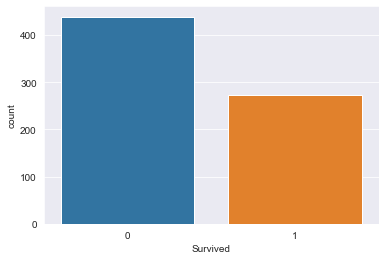

In [269]:
sns.countplot(y_train)

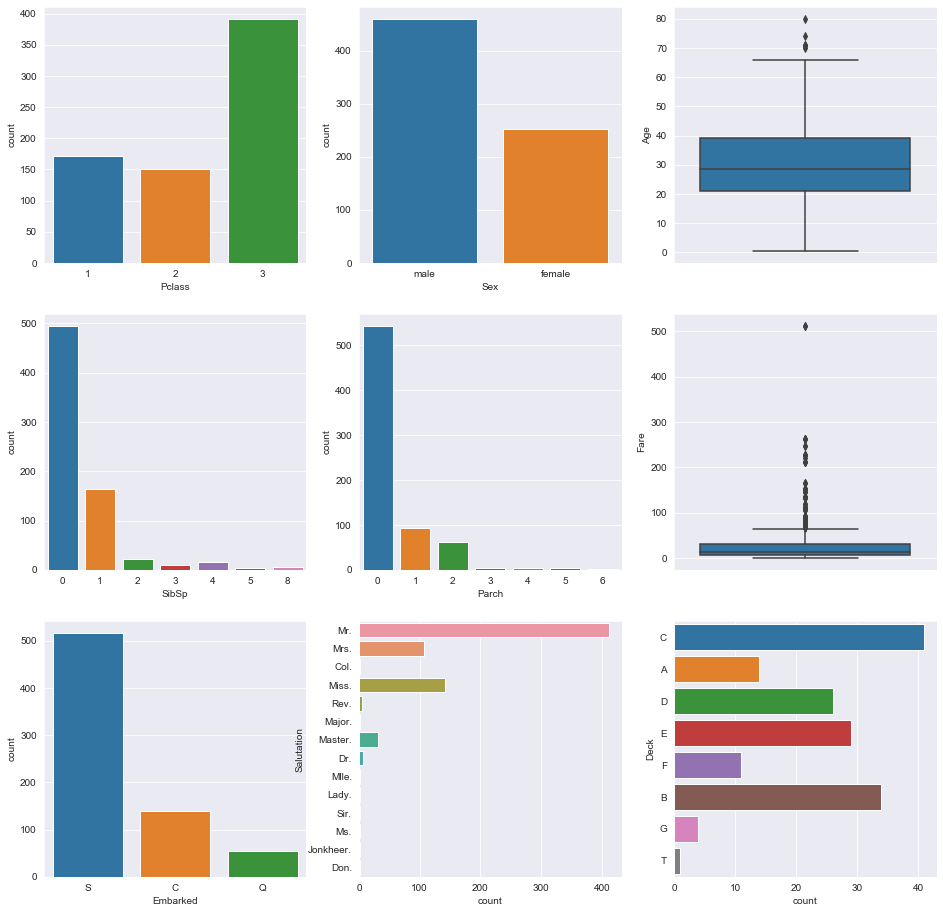

In [270]:
plt.figure(figsize = (16, 16))
plt.subplot(3, 3, 1)
sns.countplot(X_train.Pclass)
plt.subplot(3, 3, 2)
sns.countplot(X_train.Sex)
plt.subplot(3, 3, 3)
sns.boxplot(y = X_train.Age)
plt.subplot(3, 3, 4)
sns.countplot(X_train.SibSp)
plt.subplot(3, 3, 5)
sns.countplot(X_train.Parch)
plt.subplot(3, 3, 6)
sns.boxplot(y = X_train.Fare)
plt.subplot(3, 3, 7)
sns.countplot(X_train.Embarked)
plt.subplot(3, 3, 8)
sns.countplot(y = X_train.Salutation)
plt.subplot(3, 3, 9)
sns.countplot(y = X_train.Deck)

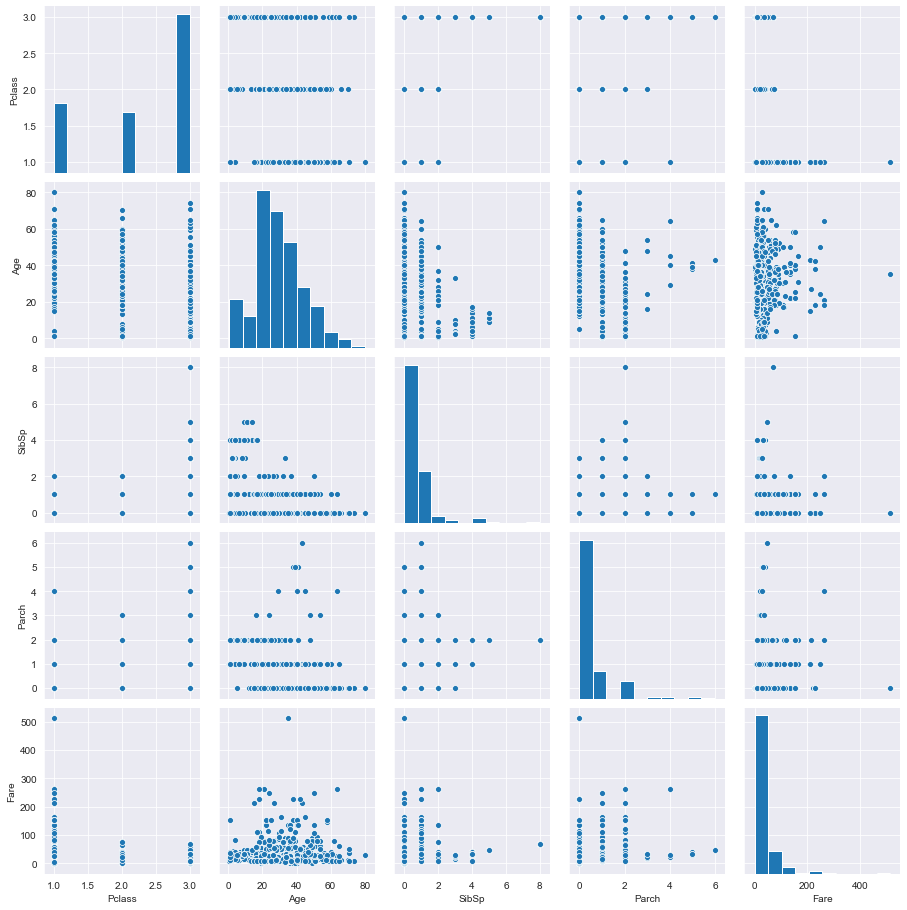

In [271]:
sns.pairplot(X_train)

In [272]:
# numerical features from the dataset
numerical_features = X_train.select_dtypes(include = ["int64", "float64"]).columns

# categorical features from the dataset

categorical_features = X_train.select_dtypes(include = ["object"]).columns

In [273]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
])

In [274]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("encoder", OneHotEncoder(handle_unknown = "ignore"))
])

In [275]:
from sklearn.compose import ColumnTransformer


data_transformer = ColumnTransformer(transformers = [
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features)
])

In [276]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import TruncatedSVD


kn_clf = KNeighborsClassifier()
svc_clf = SVC()
rf_clf = RandomForestClassifier(n_jobs = -1)
nb_clf = GaussianNB()

voting_clf = VotingClassifier(estimators = 
                             [("kn_clf", kn_clf), ("svc_clf", svc_clf), 
                              ("rf_clf", rf_clf)],
                             voting = "hard")


classifier = Pipeline(steps = [
    ("data_transformer", data_transformer),
    ("classifier", voting_clf)
])

In [277]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "data_transformer__numerical__imputer__strategy": ["mean", "median"],
    "data_transformer__categorical__imputer__strategy": ["constant", "most_frequent"],
    "classifier__kn_clf__n_neighbors": [3, 4, 5],
    "classifier__svc_clf__kernel": ["linear", "poly", "rbf"],
    "classifier__svc_clf__C": [0.1, 0.5, 1],
    "classifier__rf_clf__max_depth": [2, 4, 10, 50]
    
}

grid_search = GridSearchCV(classifier, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs = -1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('data_transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                          

In [278]:
grid_search.best_params_

{'classifier__kn_clf__n_neighbors': 3,
 'classifier__rf_clf__max_depth': 2,
 'classifier__svc_clf__C': 0.1,
 'classifier__svc_clf__kernel': 'linear',
 'data_transformer__categorical__imputer__strategy': 'constant',
 'data_transformer__numerical__imputer__strategy': 'mean'}

In [279]:
grid_search.best_score_

0.8413112080275148

#### This is great result ! Now i save this alghoritm.

In [280]:
titanic_alg = grid_search.best_estimator_

In [281]:
from sklearn.externals import joblib

joblib.dump(titanic_alg, "titanic_alg.pkl")

['titanic_alg.pkl']

## Validation on X_test dataset

In [282]:
y_test_predict = titanic_alg.predict(X_test)

In [283]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_predict)

0.8491620111731844

In [284]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_test_predict), index = ["not survived", "survived"], 
             columns = ["not survived", "survived"])

,not survived,survived
not survived,104,6
survived,21,48


In [285]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_predict)

0.8888888888888888

In [286]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_predict)

0.6956521739130435

In [287]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_predict)

0.7804878048780488

In [288]:
from sklearn.metrics import precision_recall_curve

precision, recall, treshold = precision_recall_curve(y_test, y_test_predict)

Text(0, 0.5, 'precision')

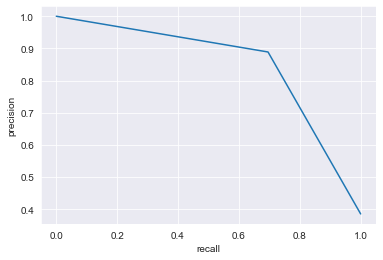

In [289]:
sns.lineplot(x = recall, y = precision)
plt.xlabel("recall")
plt.ylabel("precision")

In [290]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_test, y_test_predict)

(0, 1)

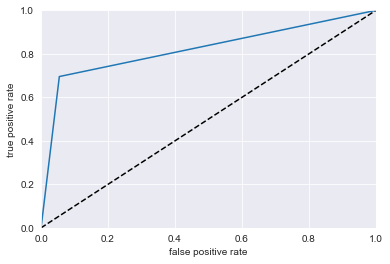

In [291]:
sns.lineplot(x = fpr, y = tpr)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.xlim([0, 1])
plt.ylim([0, 1])

In [292]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_predict)

0.8205533596837944

## Classification kaggle test dataset

In [303]:
titanic_test = pd.read_csv("titanic_test.csv")

PassengerId = titanic_test.PassengerId

In [304]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [305]:
titanic_test = preprocessing(titanic_test)

In [308]:
gender_submission = titanic_alg.predict(titanic_test)

In [309]:
gender_submission = pd.DataFrame({"Survived": gender_submission}, index = PassengerId)
gender_submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [310]:
gender_submission.to_csv("gender_submission.csv")

## My test result is 0.78947. In 26.07.2020 it place me in 16,13% the highest accuracy alghoritms.

In [300]:
3554/22035*100

16.128885863399137